# Árbol de decisión para especies de flores

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source

In [107]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

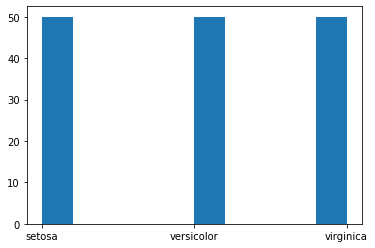

In [109]:
plt.hist(data.Species)

In [110]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [111]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [112]:
data["is_train"] = np.where(np.random.uniform(0,1,len(data)) <= 0.75,1,0)

(array([ 38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

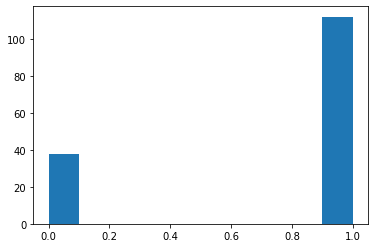

In [113]:
plt.hist(data.is_train)

In [114]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [115]:
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [116]:
preds = tree.predict(test[predictors])

In [117]:
pd.crosstab(test[target],preds,rownames=["Actual"],colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,12,0,0
versicolor,0,14,1
virginica,0,0,11


## Visualización del árbol de decisión

In [118]:
with open("resources/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [119]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 112\\nvalue = [38, 35, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.998\\nsamples = 74\\nvalue = [0, 35, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.544\\nsamples = 40\\nvalue = [0, 35, 5]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.191\\nsamples = 34\\nvalue = [0, 33, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 0, 34]"] ;\n2 -> 8 ;\n}'

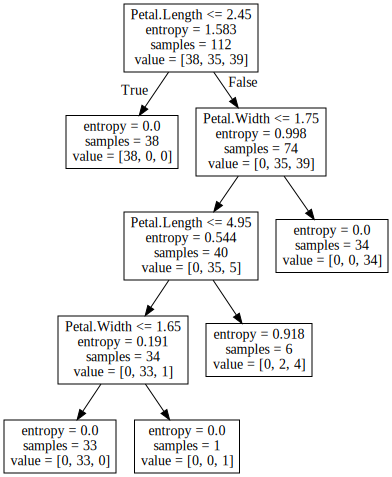

In [120]:
Source(text)

## Cross Validation para la poda

In [121]:
X = data[predictors]
Y = data[target]

In [122]:
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 20, random_state=99, max_depth=5)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [123]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [124]:
scores = cross_val_score(tree, X,Y, scoring = "accuracy", cv = cv, n_jobs = -1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [125]:
score = np.mean(scores)
score

0.9333333333333333

In [128]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 20, random_state=99, max_depth=i)
    tree.fit(X,Y)
    cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
    scores = cross_val_score(tree, X,Y, scoring = "accuracy", cv = cv, n_jobs = -1)
    score = np.mean(scores)
    print(f"Score para i = {i} es de {score}")
    print(f"   {tree.feature_importances_}")

Score para i = 1 es de 0.5666666666666667
   [0. 0. 1. 0.]
Score para i = 2 es de 0.9200000000000002
   [0.         0.         0.66620285 0.33379715]
Score para i = 3 es de 0.9400000000000001
   [0.         0.         0.68976981 0.31023019]
Score para i = 4 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 5 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 6 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 7 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 8 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 9 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i = 10 es de 0.9333333333333333
   [0.         0.         0.66869158 0.33130842]


## Random Forest 

In [130]:
forest = RandomForestClassifier(n_jobs = -1, oob_score = True, n_estimators = 10)
forest.fit(X,Y)

C:\Users\msantamaria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\msantamaria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True)

In [131]:
forest.oob_decision_function_

array([[       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [132]:
forest.oob_score_

0.9466666666666667